In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import coronavirus_report as corona

In [2]:
SAVE_DATA_PATH         = './data'
SAVE_WORLD_PLOT_PATH   = './plots/world'
SAVE_COUNTRY_PLOT_PATH = './plots/countries'

#COUNTRIES = ['Spain', 'Portugal']
#COUNTRIES = ["Italy", "US", "Spain", "France"]
COUNTRIES = ["Colombia", "Argentina", "Mexico", "Peru", "Chile", "Brazil", "Ecuador", "Uruguay", "Paraguay", "Venezuela", "Bolivia"] 
group_name = 'LATAM'

In [3]:
corona.create_folder(folder_path = SAVE_DATA_PATH)
corona.create_folder(folder_path = SAVE_WORLD_PLOT_PATH)
corona.create_folder(folder_path = SAVE_COUNTRY_PLOT_PATH + "/" + group_name)

Directory  ./data  already exists
Directory  ./plots/world  already exists
Directory  ./plots/countries/LATAM  already exists


# Download Data from Github Repositoty

In [4]:
df_confirmed, df_deaths, df_mortality = corona.get_data(savePath = SAVE_DATA_PATH)
df_confirmed.tail()

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
date                                                             
4/5/20                  349      361     1320      501      14   
4/6/20                  367      377     1423      525      16   
4/7/20                  423      383     1468      545      17   
4/8/20                  444      400     1572      564      19   
4/9/20                  484      409     1666      583      19   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
date                                                                          
4/5/20                           15       1451      822       5687    12051   
4/6/20                           15       1554      833       5797    12297   
4/7/20                           19       1628      853       5895    12639   
4/8/20                           19       1715      881       6010    12942   
4/9/20                           19       1795      921       6108    13244   

Country/Region  ...  United Arab Emirates  United Kingdom  Uruguay  \
date            ...                                                  
4/5/20          ...                  1799           48436      400   
4/6/20          ...                  2076           52279      406   
4/7/20          ...                  2359           55949      424   
4/8/20          ...                  2659           61474      424   
4/9/20          ...                  2990           65872      456   

Country/Region  Uzbekistan  Venezuela  Vietnam  West Bank and Gaza  \
date                                                                 
4/5/20                 342        159      241                 237   
4/6/20                 457        165      245                 254   
4/7/20                 520        165      249                 261   
4/8/20                 545        167      251                 263   
4/9/20                 582        171      255                 263   

Country/Region  Western Sahara  Zambia  Zimbabwe  
date                                              
4/5/20                       4      39         9  
4/6/20                       4      39        10  
4/7/20                       4      39        11  
4/8/20                       4      39        11  
4/9/20                       4      39        11  

[5 rows x 184 columns]

# DYNAMIC EVOLUTION

In [5]:
variable = 'Mortality'

if variable == "Cases" or variable == "C":
    data = df_confirmed
    var_name = 'Cases Confirmed'
elif variable == "Deaths" or variable == "D":
    data = df_deaths
    var_name = 'Deaths Confirmed'
elif variable == "Mortality" or variable == "M":
    data = df_mortality
    var_name = f'Mortality Rate (More than 100 cases)'

corona.dynamic_evolution(data, var_name = var_name, number_of_countries = 25) 

# WORD

In [6]:
# Create confirmed cases and deaths world series Including out China
df_confirmed_word = df_confirmed.sum(axis=1)
df_confirmed_word.columns = ["World"]
df_deaths_word = df_deaths.sum(axis=1)
df_deaths_word.columns = ["World"]

# Create confirmed cases world series with out China
df_confirmed_word_noChina = df_confirmed.loc[:,df_confirmed.columns != 'China'].sum(axis=1)
df_confirmed_word_noChina.columns = ["Word - No China"]

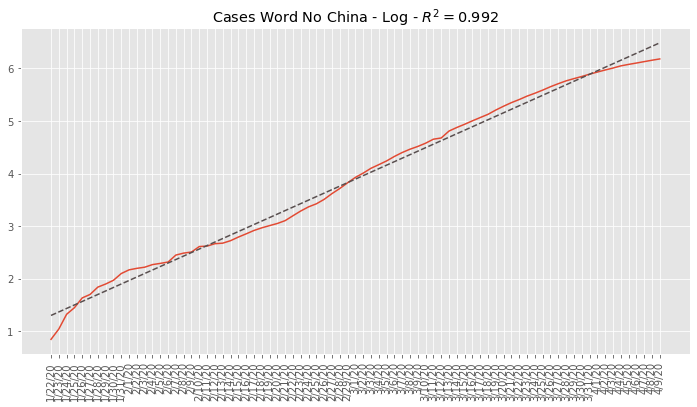

(<module 'matplotlib.pyplot' from 'C:\\Users\\juanc\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>,
 0.992)

In [7]:
corona.log_scale_plot(df_confirmed_word_noChina, "Cases Word No China", save_path = f"{SAVE_WORLD_PLOT_PATH}/log_world_cases.png")

### Exponential Factor $R^2$

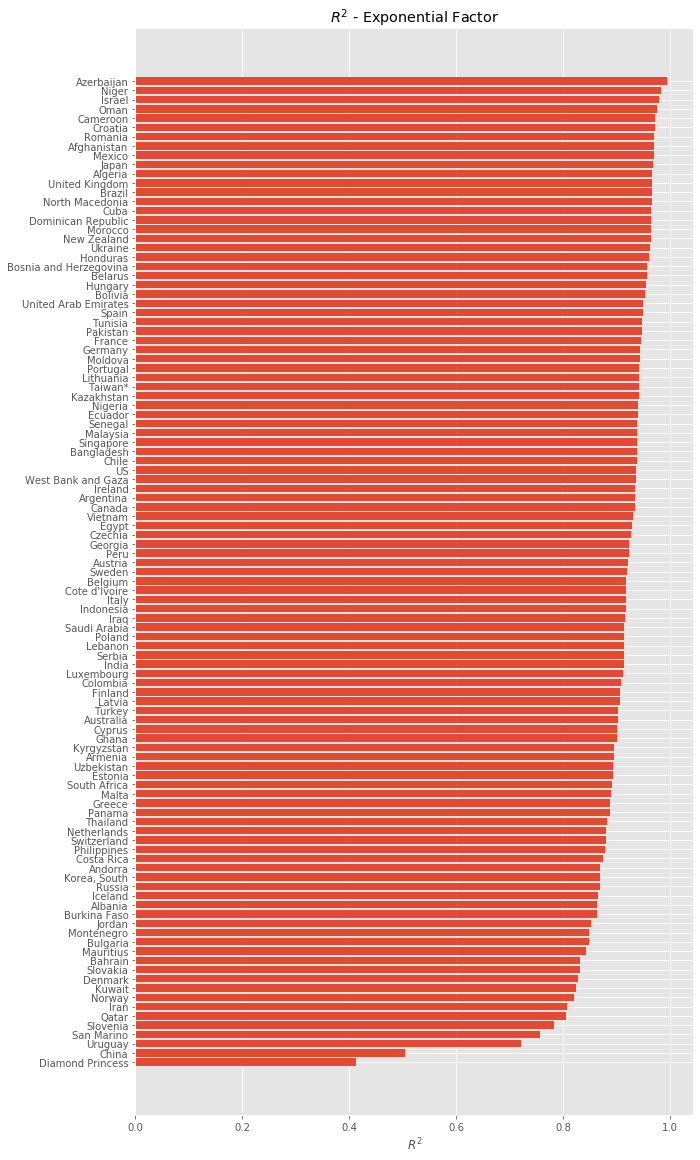

In [8]:
corona.exponential_r2(df_confirmed, threshold = 200)

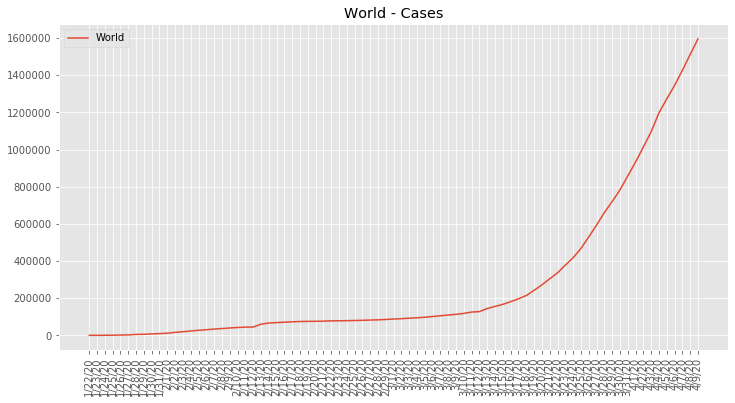

date
4/5/20    1272115
4/6/20    1345101
4/7/20    1426096
4/8/20    1511104
4/9/20    1595350
dtype: int64

In [9]:
corona.make_ts_plot(df_confirmed_word, "World - Cases", save_path = f"{SAVE_WORLD_PLOT_PATH}/world_cases.png")
df_confirmed_word.tail()

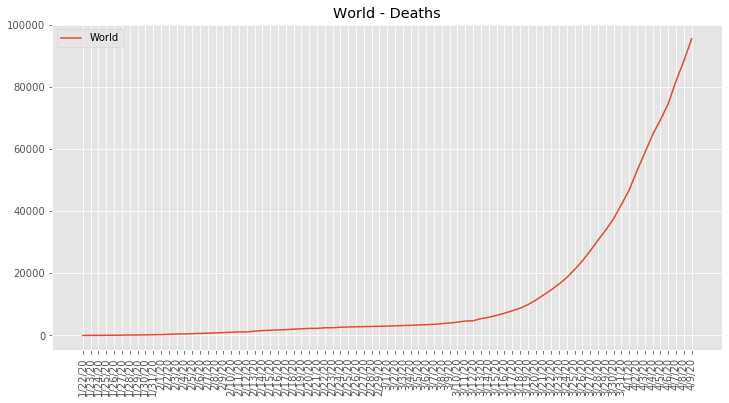

date
4/5/20    69374
4/6/20    74565
4/7/20    81865
4/8/20    88338
4/9/20    95455
dtype: int64

In [10]:
corona.make_ts_plot(df_deaths_word, "World - Deaths", save_path = f"{SAVE_WORLD_PLOT_PATH}/world_deaths.png")
df_deaths_word.tail()

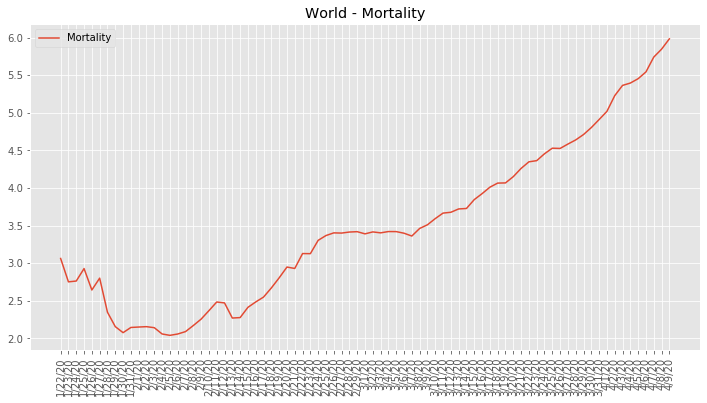

<module 'matplotlib.pyplot' from 'C:\\Users\\juanc\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
mortality = (df_deaths_word/df_confirmed_word) * 100
mortality.columns = ['Mortality']
corona.make_ts_plot(mortality, "World - Mortality", save_path = f"{SAVE_WORLD_PLOT_PATH}/world_mortality.png")

## Evolution of the factor cummulative

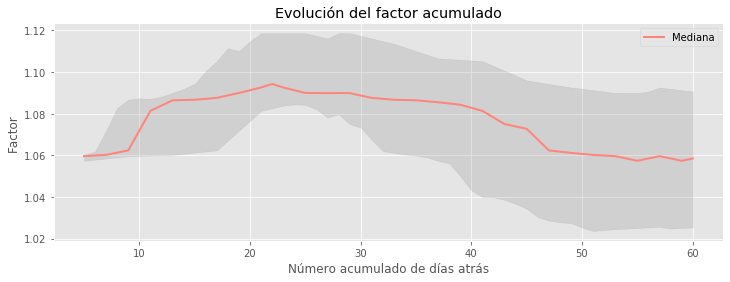

<module 'matplotlib.pyplot' from 'C:\\Users\\juanc\\AppData\\Roaming\\Python\\Python37\\site-packages\\matplotlib\\pyplot.py'>

In [12]:
corona.factor_evolution(df_confirmed_word , num_last_days = 60, start_d = 5, save_path = f"{SAVE_WORLD_PLOT_PATH}/world_factor_cum_evol.png")

## Evolution of the factor

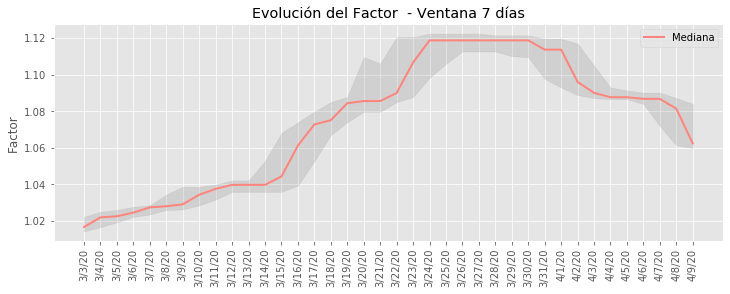

In [13]:
factor_smt_word = corona.moving_median(df_confirmed_word, window=7, last_n_days = 45, save_path = f"{SAVE_WORLD_PLOT_PATH}/world_factor_evol.png")

## Factor Change

Previous data correspond to: 7 days ago


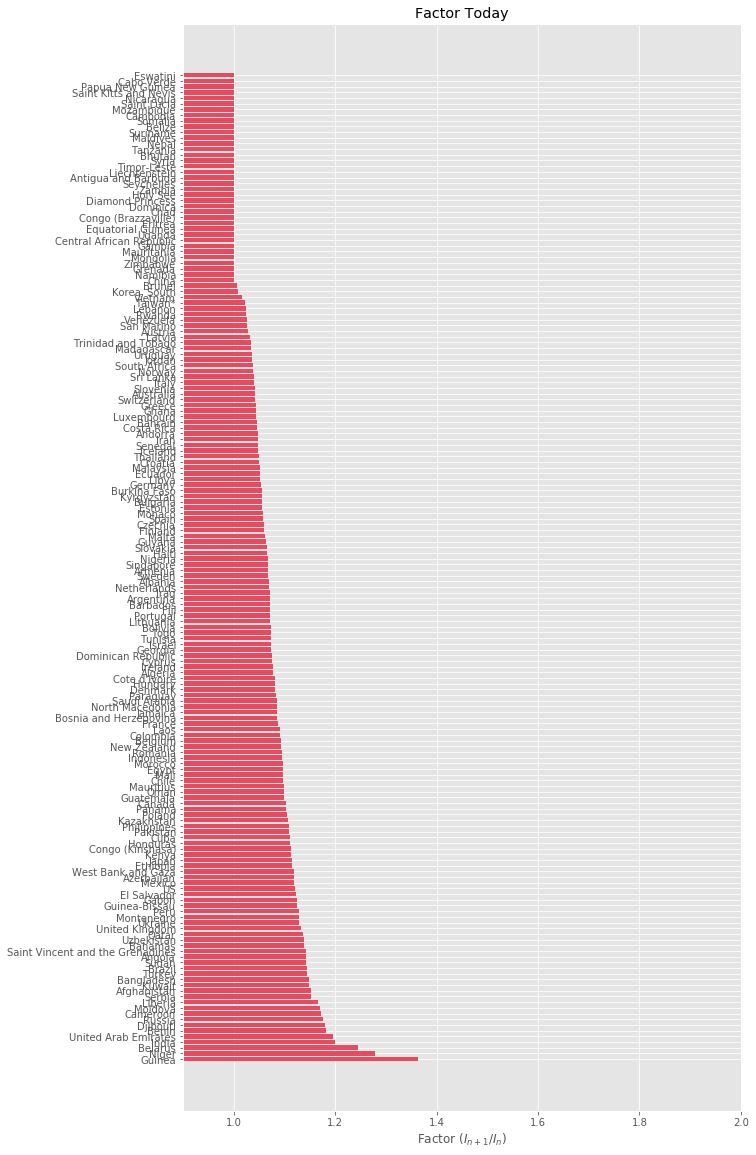

Previous  Today  Change  positive
Eswatini                    1.0    1.0     0.0      True
Cabo Verde                  1.0    1.0     0.0      True
Papua New Guinea            1.0    1.0     0.0      True
Saint Kitts and Nevis       1.0    1.0     0.0      True
Nicaragua                   1.0    1.0     0.0      True

In [14]:
dataFactor = corona.factor_plot(df_confirmed, window = 7, var_name = 'Today', past_days_contrast = 7, save_path = f"{SAVE_WORLD_PLOT_PATH}/world_factor_today.png") # var_name = 'Change' or 'Today'
dataFactor.head()

Previous data correspond to: 7 days ago


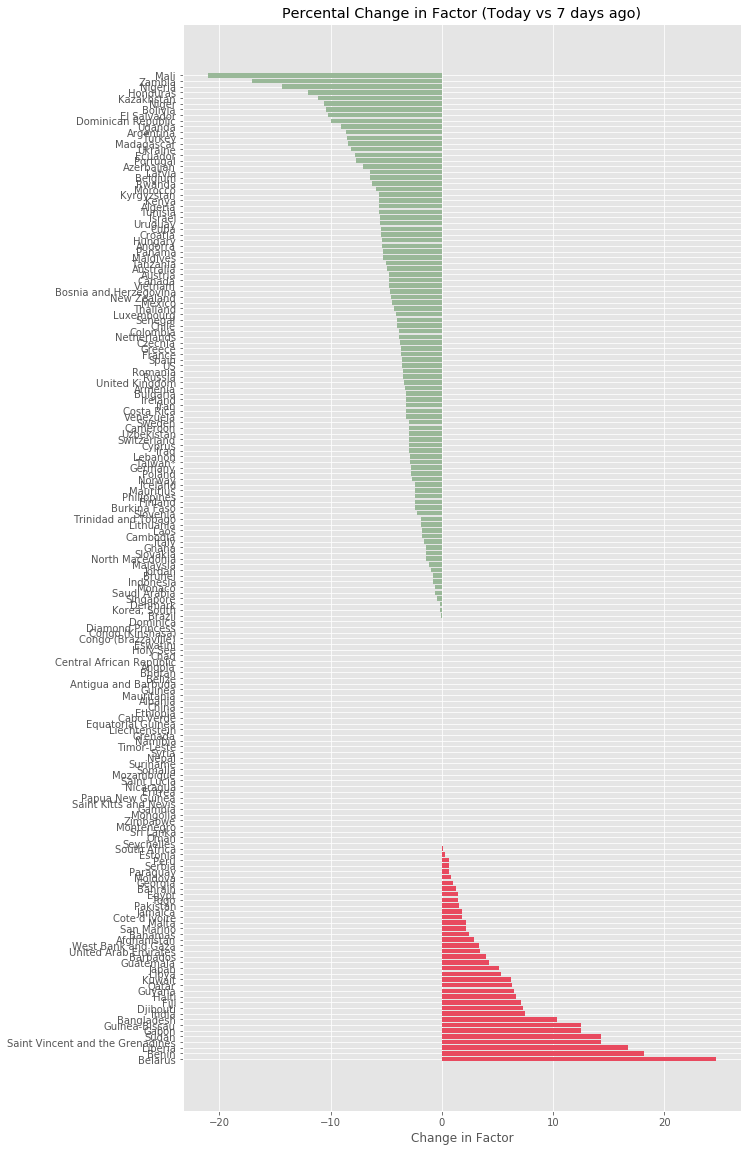

In [15]:
dataFactor = corona.factor_plot(df_confirmed, window = 7, var_name = 'Change', past_days_contrast = 7, save_path = f"{SAVE_WORLD_PLOT_PATH}/world_factor_change.png") # var_name = 'Change' or 'Today'

# BY COUNTRY

In [16]:
data1 = df_confirmed.loc[:, COUNTRIES]
data2 = df_deaths.loc[:, COUNTRIES]

# Total Cases

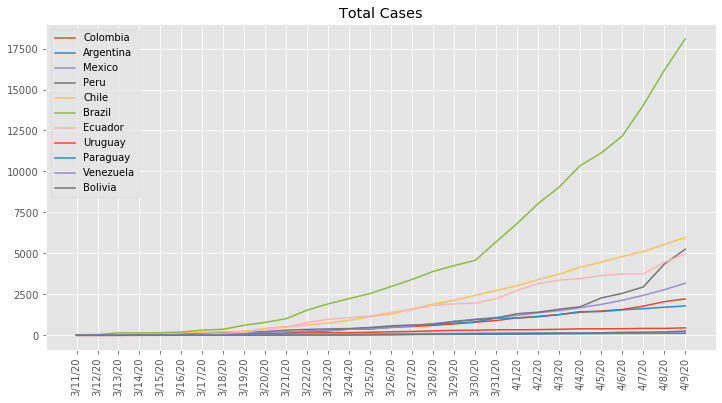

Country/Region  Colombia  Argentina  Mexico  Peru  Chile  Brazil  Ecuador  \
date                                                                        
4/5/20              1485       1451    1890  2281   4471   11130     3646   
4/6/20              1579       1554    2143  2561   4815   12161     3747   
4/7/20              1780       1628    2439  2954   5116   14034     3747   
4/8/20              2054       1715    2785  4342   5546   16170     4450   
4/9/20              2223       1795    3181  5256   5972   18092     4965   

Country/Region  Uruguay  Paraguay  Venezuela  Bolivia  
date                                                   
4/5/20              400       104        159      157  
4/6/20              406       113        165      183  
4/7/20              424       115        165      194  
4/8/20              424       119        167      210  
4/9/20              456       124        171      264

In [17]:
corona.make_ts_plot(data1.iloc[len(data1)-30:,:], "Total Cases", save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_cases.png") #data1.iloc[:len(data1)-1,:]
data1.tail()

# Factors

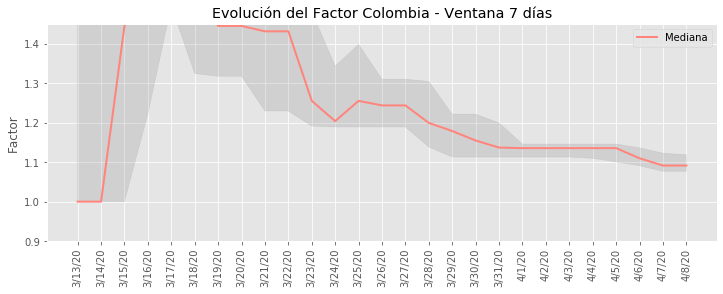

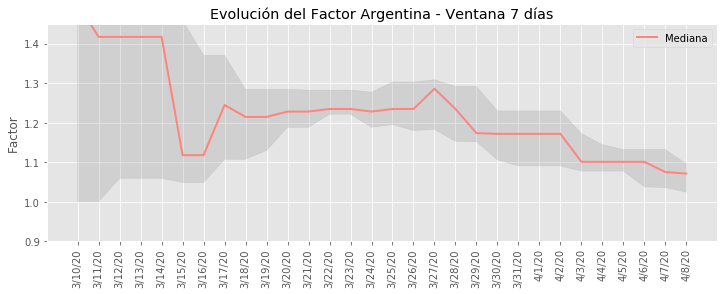

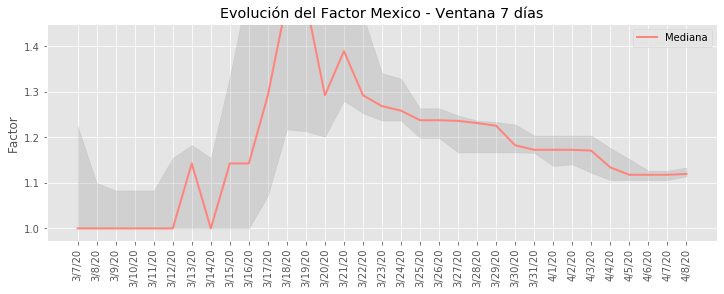

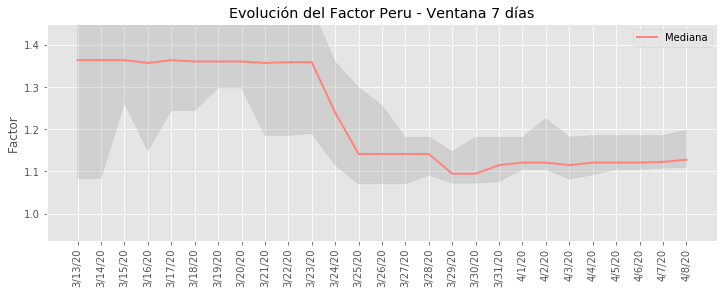

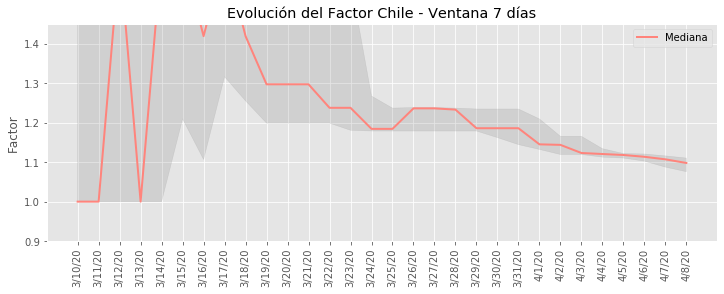

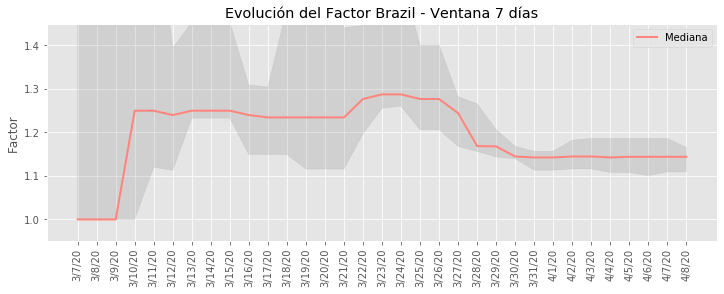

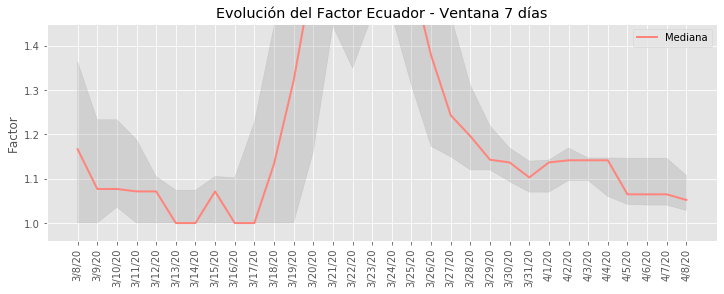

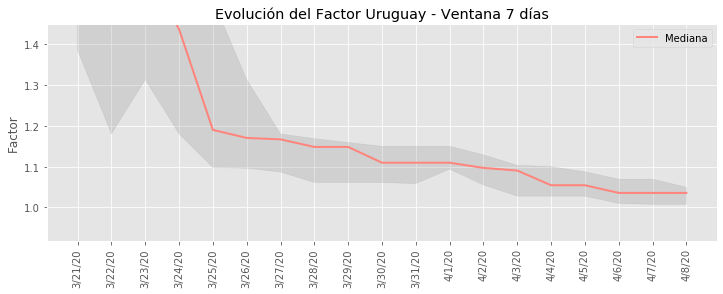

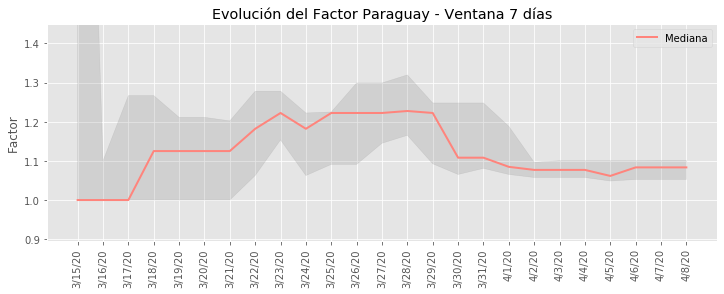

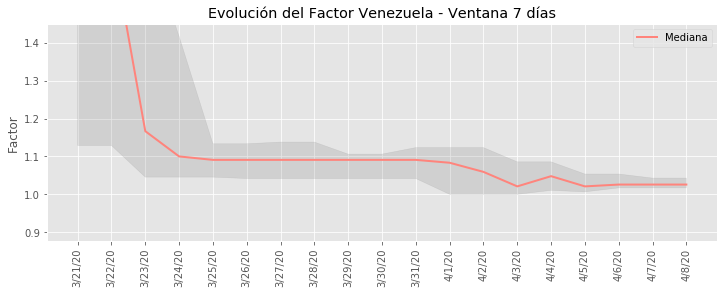

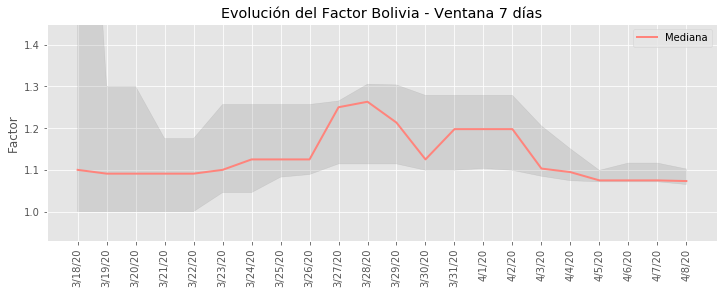

In [18]:
for i in data1.columns:
    smt_f = corona.moving_median(data1.iloc[:len(data1)-1,:][i], window=7, last_n_days = 40, spec_name = i, show_quantiles = True, ylim_top = 1.45, plotIt = True, save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_factor_evol_{i}.png")

Previous data correspond to: 7 days ago


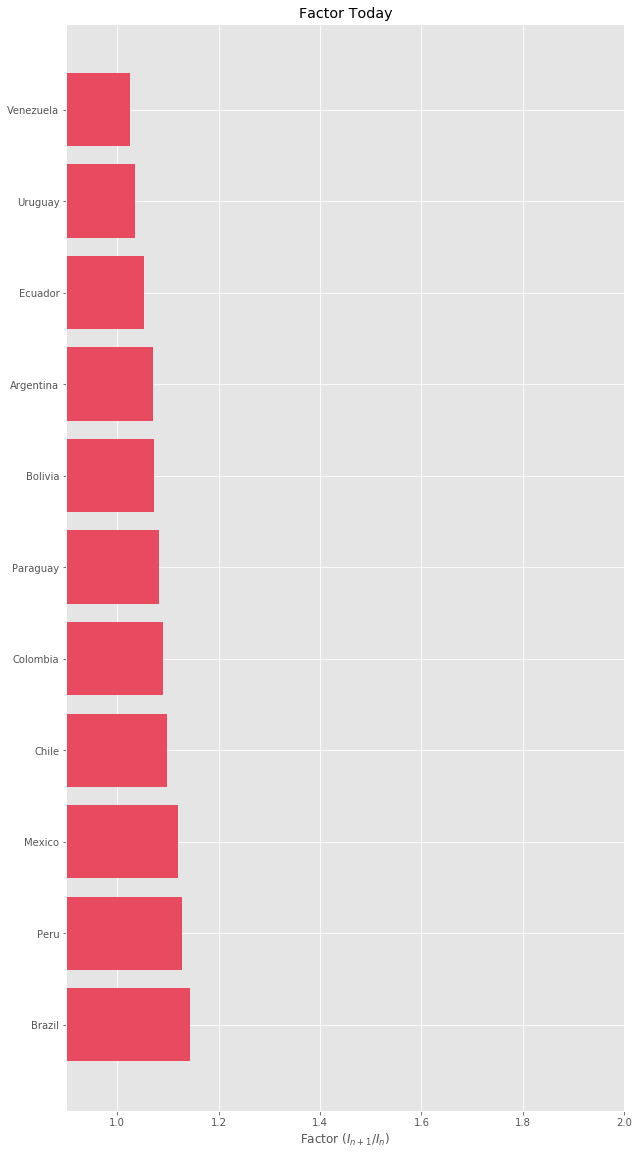

Previous     Today  Change  positive
Venezuela  1.059259  1.025806    -3.2      True
Uruguay    1.096774  1.035503    -5.6      True
Ecuador    1.141692  1.052237    -7.8      True
Argentina  1.171477  1.070986    -8.6      True
Bolivia    1.197531  1.073171   -10.4      True
Paraguay   1.076923  1.083333     0.6      True
Colombia   1.135338  1.091301    -3.9      True
Chile      1.143608  1.097826    -4.0      True
Mexico     1.172840  1.119668    -4.5      True
Peru       1.121053  1.128006     0.6      True
Brazil     1.144724  1.143993    -0.1      True

In [19]:
dataFactor = corona.factor_plot(data1, window = 7, var_name = 'Today', past_days_contrast = 7, save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_factor_today.png") # var_name = 'Change' or 'Today'
dataFactor

# Daily Plot

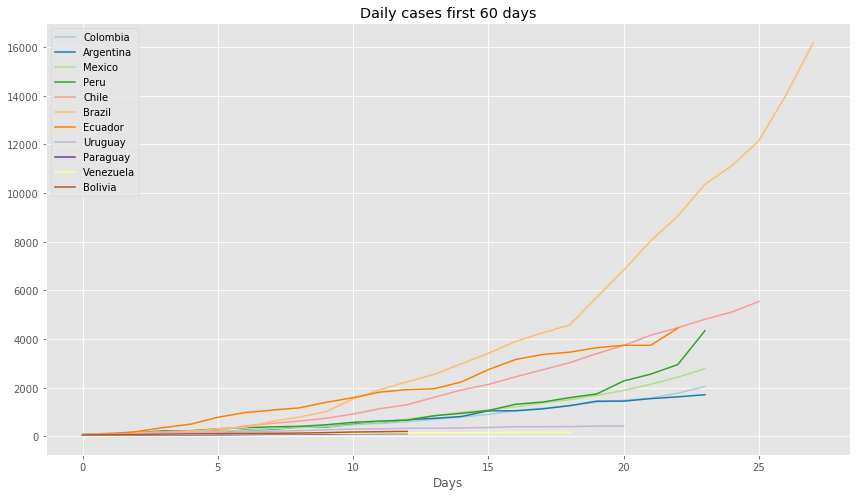

In [20]:
df, plot_daily = corona.daily_plot(data1.iloc[:len(data1)-1,:], num_days = 60, threshold_cases = 50, save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_dalily_cases.png")
# df

### Factor -> I(n+1)/I(n)

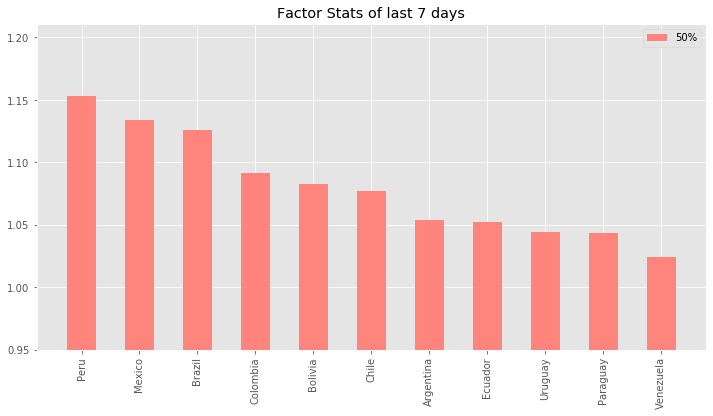

count      mean       std       min       25%       50%  \
Country/Region                                                            
Peru              7.0  1.212239  0.133932  1.094671  1.125379  1.153456   
Mexico            7.0  1.127054  0.016997  1.095791  1.118775  1.133862   
Brazil            7.0  1.123120  0.030474  1.074324  1.105747  1.125808   
Colombia          7.0  1.097715  0.035042  1.056188  1.072789  1.091301   
Bolivia           7.0  1.117290  0.073711  1.053030  1.066640  1.082474   
Chile             7.0  1.083729  0.016892  1.062513  1.075657  1.076940   
Argentina         7.0  1.068890  0.048837  1.000000  1.047133  1.053440   
Ecuador           7.0  1.068128  0.064070  1.000000  1.028251  1.052237   
Uruguay           7.0  1.039015  0.034728  1.000000  1.007500  1.044335   
Paraguay          7.0  1.071808  0.059815  1.017699  1.038400  1.043478   
Venezuela         7.0  1.022948  0.016300  1.000000  1.012597  1.023952   

                     75%       max  
Country/Region                      
Peru            1.258458  1.469871  
Mexico          1.139993  1.142190  
Brazil          1.148097  1.154017  
Colombia        1.118502  1.153933  
Bolivia         1.147551  1.257143  
Chile           1.090938  1.113460  
Argentina       1.093745  1.147036  
Ecuador         1.090271  1.187617  
Uruguay         1.064879  1.084011  
Paraguay        1.084936  1.194805  
Venezuela       1.031771  1.047945

In [21]:
# Factor by country of the last n days sorted by median.
d_factor, plt = corona.create_factor_stats(data1, last_n_days=7, plotIt=True, plt_qrt = ["50"], save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_factor_stats.png") #"75","50","25","min"
d_factor

# Forecast

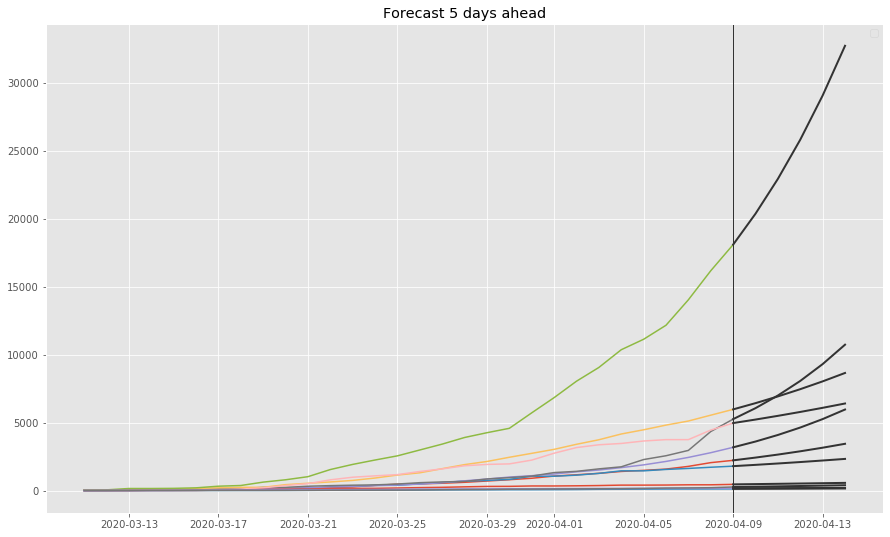

Colombia  Argentina  Mexico     Peru   Chile   Brazil  Ecuador  \
2020-04-09    2223.0     1795.0  3181.0   5256.0  5972.0  18092.0   4965.0   
2020-04-10    2426.0     1891.0  3607.0   6063.0  6431.0  20368.0   5224.0   
2020-04-11    2647.0     1992.0  4090.0   6993.0  6926.0  22931.0   5497.0   
2020-04-12    2889.0     2098.0  4637.0   8066.0  7459.0  25815.0   5784.0   
2020-04-13    3153.0     2211.0  5258.0   9304.0  8033.0  29063.0   6087.0   
2020-04-14    3441.0     2329.0  5962.0  10732.0  8651.0  32720.0   6405.0   

            Uruguay  Paraguay  Venezuela  Bolivia  
2020-04-09    456.0     124.0      171.0    264.0  
2020-04-10    476.0     129.0      175.0    286.0  
2020-04-11    497.0     135.0      179.0    309.0  
2020-04-12    519.0     141.0      184.0    335.0  
2020-04-13    542.0     147.0      188.0    362.0  
2020-04-14    566.0     153.0      192.0    392.0

In [22]:
forecast_n    = 5  # Number of days to forecast
history       = 7 # History to calculate the factor
history_plot  = 30  # Number of days to plot before

forecast_low, forecast_med, forecast_hig = corona.forecast_corona(data1, # data1.iloc[:len(data1)-1,:]
                                                forecast_n = forecast_n, 
                                                history_plot = history_plot, 
                                                history = history,
                                                highlight_country = "",#data1.columns, #data1.columns,
                                                plot_intervals = False, 
                                                save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_forecast_cases.png")
forecast_med

In [23]:
forecast_low

Colombia  Argentina  Mexico    Peru   Chile   Brazil  Ecuador  \
2020-04-09    2223.0     1795.0  3181.0  5256.0  5972.0  18092.0   4965.0   
2020-04-10    2385.0     1880.0  3559.0  5915.0  6424.0  20005.0   5105.0   
2020-04-11    2558.0     1968.0  3982.0  6657.0  6910.0  22121.0   5249.0   
2020-04-12    2745.0     2061.0  4454.0  7491.0  7433.0  24460.0   5398.0   
2020-04-13    2944.0     2158.0  4984.0  8430.0  7995.0  27046.0   5550.0   
2020-04-14    3159.0     2260.0  5575.0  9487.0  8600.0  29906.0   5707.0   

            Uruguay  Paraguay  Venezuela  Bolivia  
2020-04-09    456.0     124.0      171.0    264.0  
2020-04-10    459.0     129.0      173.0    282.0  
2020-04-11    463.0     134.0      175.0    300.0  
2020-04-12    466.0     139.0      178.0    320.0  
2020-04-13    470.0     144.0      180.0    342.0  
2020-04-14    473.0     150.0      182.0    364.0

# DEATHS

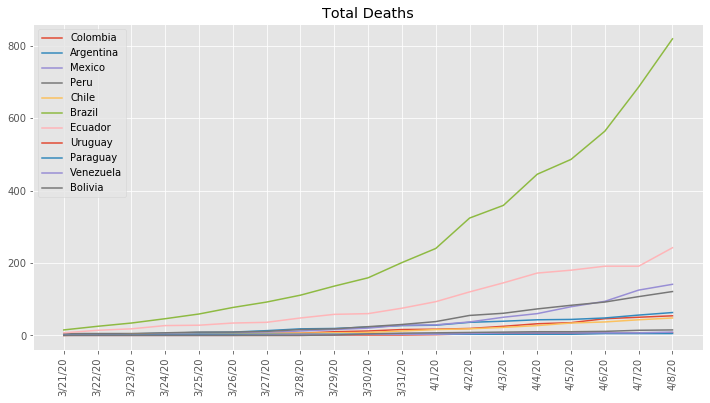

Country/Region  Colombia  Argentina  Mexico  Peru  Chile  Brazil  Ecuador  \
date                                                                        
4/5/20                35         44      79    83     34     486      180   
4/6/20                46         48      94    92     37     564      191   
4/7/20                50         56     125   107     43     686      191   
4/8/20                54         63     141   121     48     819      242   
4/9/20                69         72     174   138     57     950      272   

Country/Region  Uruguay  Paraguay  Venezuela  Bolivia  
date                                                   
4/5/20                5         3          7       10  
4/6/20                6         5          7       11  
4/7/20                7         5          7       14  
4/8/20                7         5          9       15  
4/9/20                7         5          9       18

In [24]:
corona.make_ts_plot(data2.iloc[len(data1)-20:len(data1)-1,:], "Total Deaths", save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_deaths.png")
data2.tail()

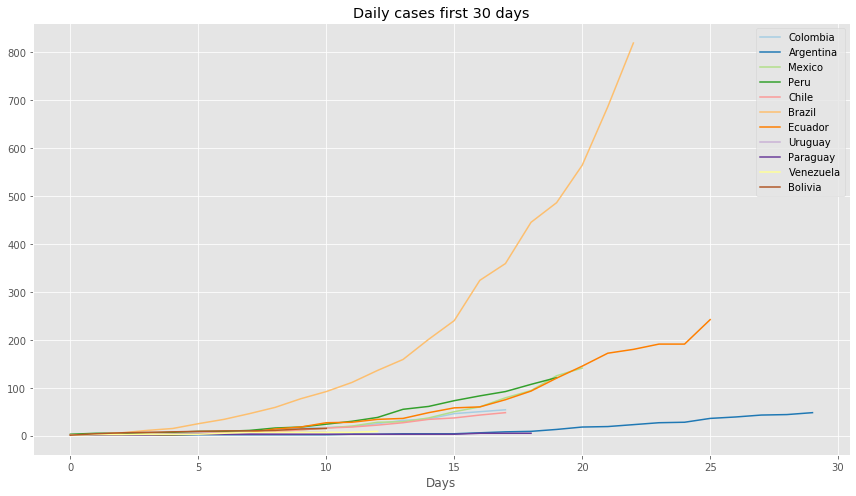

In [25]:
df, plot_daily = corona.daily_plot(data2.iloc[:len(data1)-1,:], num_days = 30, save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_daily_deaths.png")

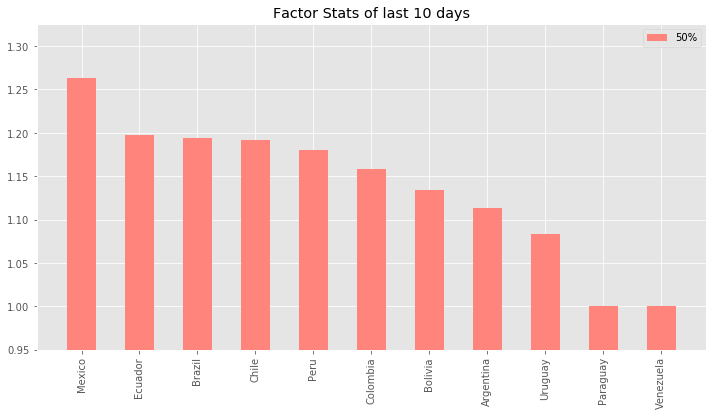

(                count      mean       std       min       25%       50%  \
 Country/Region                                                            
 Mexico           10.0  1.247726  0.111114  1.035714  1.192405  1.262931   
 Ecuador          10.0  1.158398  0.110527  1.000000  1.050161  1.197270   
 Brazil           10.0  1.198770  0.075360  1.092135  1.162650  1.193954   
 Chile            10.0  1.217662  0.124379  1.088235  1.129464  1.192192   
 Peru             10.0  1.214249  0.110886  1.108434  1.132377  1.179882   
 Colombia         10.0  1.188426  0.112281  1.062500  1.088655  1.158824   
 Bolivia          10.0  1.448979  0.906753  1.000000  1.102778  1.133929   
 Argentina        10.0  1.129892  0.080639  1.023256  1.085227  1.113782   
 Uruguay          10.0  1.261667  0.400775  1.000000  1.000000  1.083333   
 Paraguay         10.0  1.066667  0.210819  1.000000  1.000000  1.000000   
 Venezuela        10.0  1.185238  0.256677  1.000000  1.000000  1.000000   
 
          

In [26]:
d_factor = corona.create_factor_stats(data2.iloc[:len(data1)-1,:], last_n_days=10, plotIt=True , plt_qrt = ["50"], save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_factor_stats_deaths.png")
d_factor

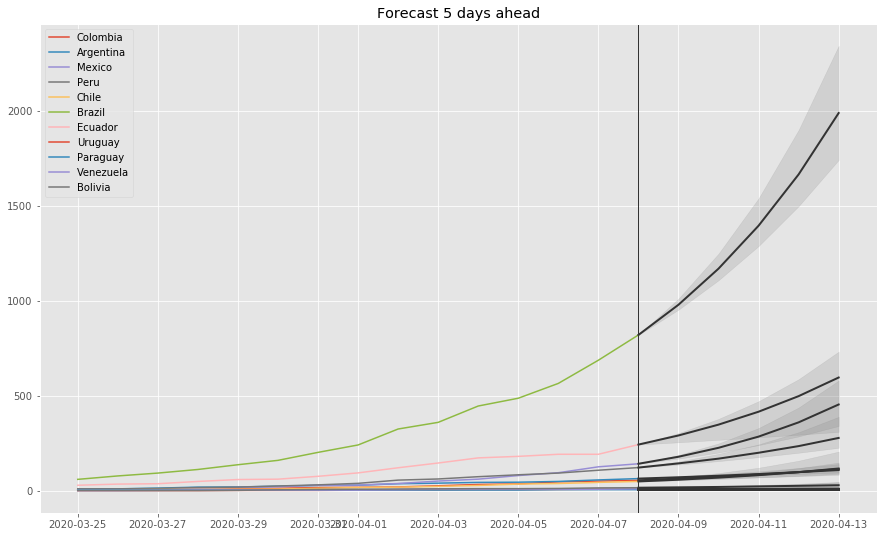

Colombia  Argentina  Mexico   Peru  Chile  Brazil  Ecuador  \
2020-04-08      54.0       63.0   141.0  121.0   48.0   819.0    242.0   
2020-04-09      63.0       70.0   178.0  143.0   57.0   978.0    290.0   
2020-04-10      73.0       78.0   225.0  168.0   68.0  1168.0    347.0   
2020-04-11      84.0       87.0   284.0  199.0   81.0  1394.0    415.0   
2020-04-12      97.0       97.0   359.0  234.0   97.0  1664.0    497.0   
2020-04-13     113.0      108.0   453.0  277.0  116.0  1987.0    595.0   

            Uruguay  Paraguay  Venezuela  Bolivia  
2020-04-08      7.0       5.0        9.0     15.0  
2020-04-09      8.0       5.0        9.0     17.0  
2020-04-10      8.0       5.0        9.0     19.0  
2020-04-11      9.0       5.0        9.0     22.0  
2020-04-12     10.0       5.0        9.0     25.0  
2020-04-13     10.0       5.0        9.0     28.0

In [27]:
forecast_n    = 5  # Number of days to forecast
history       = 10 # History to calculate the factor
history_plot  = 15  # Number of days to plot before

forecast_low, forecast_med, forecast_hig = corona.forecast_corona(data2.iloc[:len(data1)-1,:], # data2.iloc[:len(data1)-1,:]
                                                forecast_n = forecast_n, 
                                                history_plot = history_plot, 
                                                history = history,
                                                highlight_country = data1.columns, #data1.columns
                                                plot_intervals = False,
                                                decrease_factor_speed = 1, 
                                                save_path = f"{SAVE_COUNTRY_PLOT_PATH}/{group_name}/{group_name}_forecast_deaths.png") # 0.99
forecast_med